In [1]:
print('all ok')

all ok


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [8]:
df=pd.read_csv(r'../Datasets/titanic_train.csv',usecols=['Survived','Age','Fare'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
df.shape

(714, 3)

In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
x.head(2)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [17]:
clf=DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.5874125874125874


In [18]:
print("Accuracy in CV: ",np.mean(cross_val_score(DecisionTreeClassifier(),x,y,scoring='accuracy',cv=10)))

Accuracy in CV:  0.6386932707355243


### Discritization

In [19]:
dis_age_trans=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
dis_fare_trans=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [20]:
trf=ColumnTransformer(transformers=[
    ('age_trans',dis_age_trans,['Age']),
    ('fare_trans',dis_fare_trans,['Fare'])
],remainder='passthrough')

In [21]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [24]:
trf.named_transformers_['age_trans'].n_bins

10

In [25]:
trf.named_transformers_['age_trans'].bin_edges_

array([array([ 0.67, 14.  , 19.  , 22.  , 25.  , 28.  , 31.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [27]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trans[:,0],
    'fare':x_train['Fare'],
    'fare_trf': x_train_trans[:,1]}
)

In [31]:
output['Age_bins']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['age_trans'].bin_edges_[0])
output['Fare_bins']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['fare_trans'].bin_edges_[0])

In [33]:
output.head()

,age,age_trf,fare,fare_trf,Age_bins,Fare_bins
665,32.0,6.0,73.500,8.0,"(31.0, 36.0]","(46.9, 79.65]"
278,7.0,0.0,29.125,7.0,"(0.67, 14.0]","(24.15, 29.125]"
346,40.0,7.0,13.000,4.0,"(36.0, 42.0]","(12.475, 14.5]"
764,16.0,1.0,7.775,1.0,"(14.0, 19.0]","(7.75, 7.896]"
729,25.0,4.0,7.925,2.0,"(22.0, 25.0]","(7.896, 8.662]"


In [34]:
clf=DecisionTreeClassifier()

clf.fit(x_train_trans,y_train)

y_pred=clf.predict(x_test_trans)

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.6643356643356644


In [35]:
x_trans=trf.fit_transform(x)

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [36]:
print("Accuracy in CV: ",np.mean(cross_val_score(DecisionTreeClassifier(),x_trans,y,scoring='accuracy',cv=10)))

Accuracy in CV:  0.682140062597809


In [41]:
def discretize(bins,strategy):
    dis_age_trans=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    dis_fare_trans=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    trf=ColumnTransformer(transformers=[
        ('age_trans',dis_age_trans,['Age']),
        ('fare_trans',dis_fare_trans,['Fare'])
            ],remainder='passthrough')
    x_trans=trf.fit_transform(x)

    print("accuracy score:",np.mean(cross_val_score(DecisionTreeClassifier(),x_trans,y,scoring='accuracy',cv=10)))


    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
    ax1.hist(x_train['Age'])
    ax1.set_title(f"Before Transformation Age")

    ax2.hist(x_trans[:,0],color='red')
    ax2.set_title(f"After Transformation Age")

    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
    ax1.hist(x_train['Fare'])
    ax1.set_title(f"Before Transformation Fare")

    ax2.hist(x_trans[:,1],color='red')
    ax2.set_title(f"After Transformation Fare")

    plt.show()
    
    

c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\Hp\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


accuracy score: 0.682140062597809


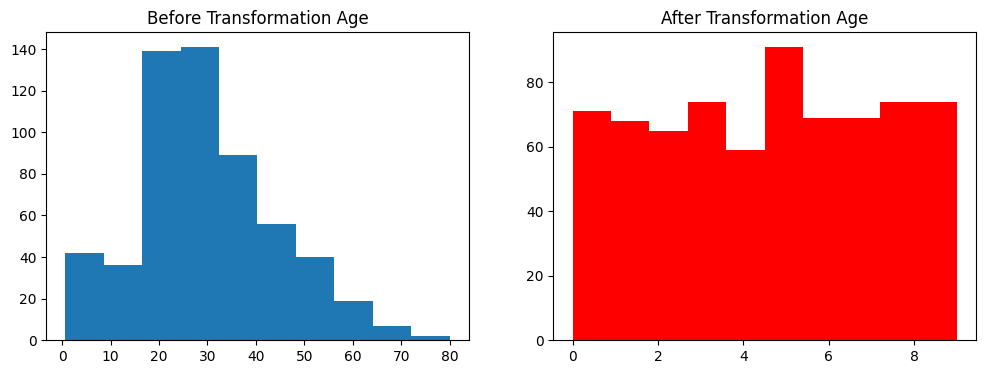

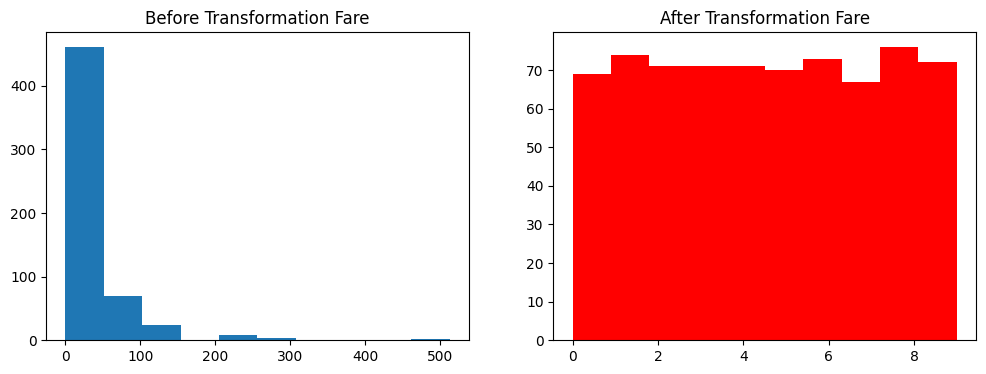

In [42]:
discretize(10,'quantile')

accuracy score: 0.6723982785602504


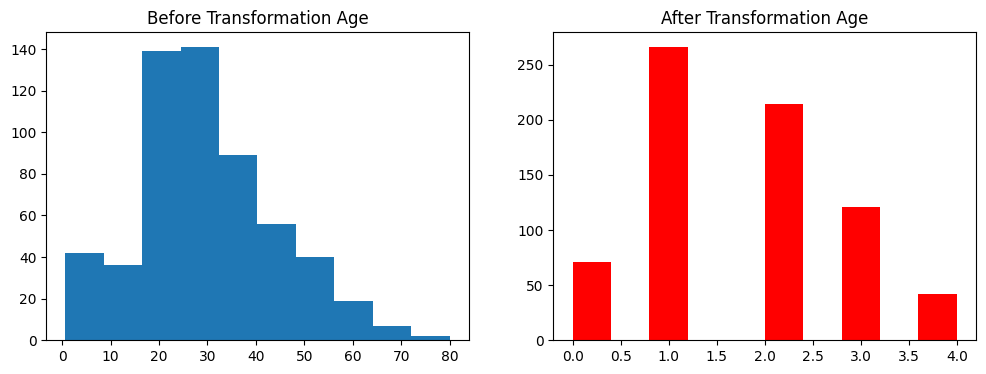

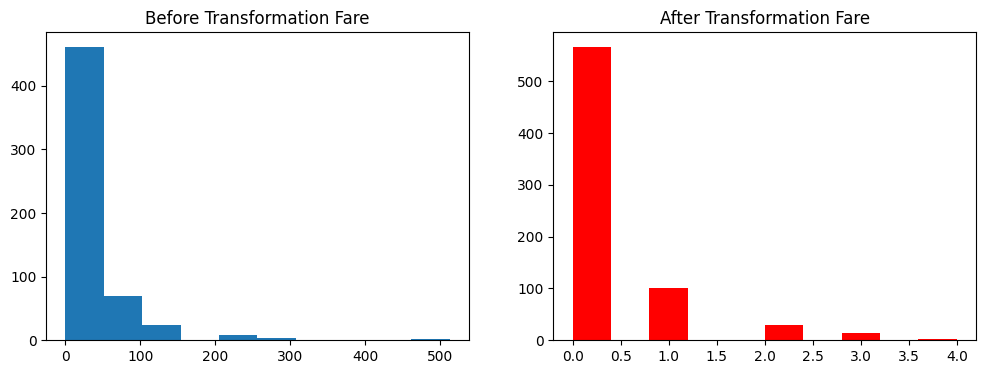

In [43]:
discretize(5,'kmeans')

### Binarization

In [44]:
df=pd.read_csv(r'../Datasets/titanic_train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [45]:
df=df[['Survived','Age','SibSp','Parch','Fare']]

In [46]:
df.head(2)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833


In [47]:
df['family']=df['SibSp']+df['Parch']
df.head(2)

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1


In [48]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [49]:
df.head(2)

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1


In [50]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
family        0
dtype: int64

In [53]:
df=df.dropna()

In [55]:
df.head(2)

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1


In [56]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [57]:
x.head(2)

,Age,Fare,family
0,22.0,7.2500,1
1,38.0,71.2833,1


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [59]:
clf=DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.6363636363636364


In [60]:
print("Accuracy with CV:",np.mean(cross_val_score(DecisionTreeClassifier(),x,y,scoring='accuracy')))

Accuracy with CV: 0.6554614399684823


In [61]:
from sklearn.preprocessing import Binarizer




In [62]:
trf=ColumnTransformer(transformers=[
    ('binary',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [63]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

clf=DecisionTreeClassifier()
clf.fit(x_train_trans,y_train)

y_pred=clf.predict(x_test_trans)

print("Accuracy score after binarization:",accuracy_score(y_test,y_pred))


Accuracy score after binarization: 0.6573426573426573


In [65]:
x_trans=trf.fit_transform(x)

print("Accuracy after binarization with CV:",np.mean(cross_val_score(DecisionTreeClassifier(),x_trans,y,scoring='accuracy',cv=10)))

Accuracy after binarization with CV: 0.6290101721439749
